## INTRODUCTION

Creating the model to predict the loan approvement.

DataSet : The dataset contains information about the loan approval which also includes there details like credit score, income, home ownership, purpose. It contains 30k entries in the datset.

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df_a = pd.read_csv('loan_approval.csv')

In [5]:
df_a.head()

,income,credit_score,loan_amount,loan_term,employment_length,existing_debt,num_credit_lines,home_ownership,purpose,birth_year,monthly_rent_or_mortgage,has_default_last_7yrs,loan_approved
0,57450,600,25788,48,11,16569.26,9,Rent,Education,1979,1691,0,0
1,47926,647,30628,12,5,17333.25,8,Mortgage,Personal,1964,1278,0,0
2,59715,670,28411,12,1,23309.66,4,Other,Debt Consolidation,1954,1268,0,0
3,72845,707,12220,12,15,12695.63,9,Rent,Home Improvement,1995,1815,0,1
4,46487,751,23137,12,12,21292.12,9,Mortgage,Personal,1950,672,0,1


In [6]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   income                    30000 non-null  int64  
 1   credit_score              30000 non-null  int64  
 2   loan_amount               30000 non-null  int64  
 3   loan_term                 30000 non-null  int64  
 4   employment_length         30000 non-null  int64  
 5   existing_debt             30000 non-null  float64
 6   num_credit_lines          30000 non-null  int64  
 7   home_ownership            30000 non-null  object 
 8   purpose                   30000 non-null  object 
 9   birth_year                30000 non-null  int64  
 10  monthly_rent_or_mortgage  30000 non-null  int64  
 11  has_default_last_7yrs     30000 non-null  int64  
 12  loan_approved             30000 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 3.0+ MB


<Axes: >

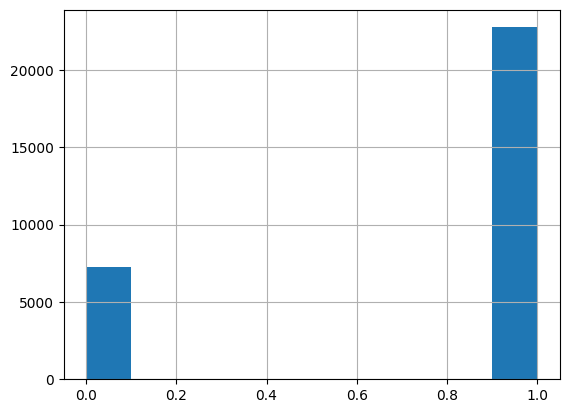

In [7]:
# Histogram to find the distribution of the target variable

df_a.loan_approved.hist()

From the histogram, we can that the dataset is not balanced. The distribution of 1.0 is nearly 3 times more than 0.0.

In [8]:
df_a.describe()

,income,credit_score,loan_amount,loan_term,employment_length,existing_debt,num_credit_lines,birth_year,monthly_rent_or_mortgage,has_default_last_7yrs,loan_approved
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,50123.081967,699.499233,25108.312867,35.894800,9.571900,20119.741999,6.542033,1976.963133,1702.633567,0.046000,0.758933
std,14673.226191,50.206795,9759.059073,16.967266,4.859213,9803.476549,2.922063,15.849562,497.529416,0.209489,0.427738
min,20000.000000,476.000000,5000.000000,12.000000,0.000000,0.000000,1.000000,1950.000000,500.000000,0.000000,0.000000
25%,39841.500000,666.000000,18328.750000,24.000000,6.000000,13286.810000,4.000000,1963.000000,1366.750000,0.000000,1.000000
50%,50027.500000,700.000000,25044.000000,36.000000,10.000000,19944.405000,7.000000,1977.000000,1700.000000,0.000000,1.000000
75%,60123.250000,734.000000,31748.250000,48.000000,13.000000,26726.295000,9.000000,1991.000000,2036.000000,0.000000,1.000000
max,117186.000000,850.000000,50000.000000,60.000000,30.000000,50000.000000,15.000000,2004.000000,3962.000000,1.000000,1.000000


<Axes: >

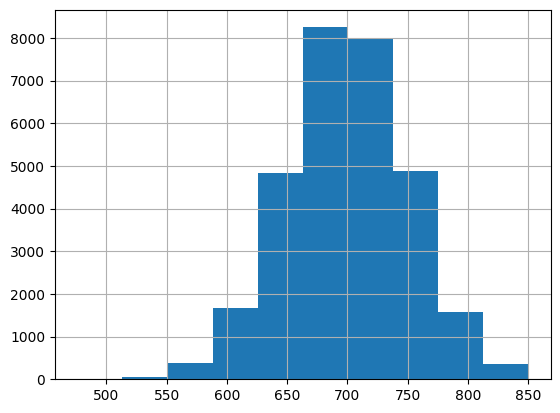

In [9]:
# Histogram to show the distribution of the credit score

df_a.credit_score.hist()

<Axes: xlabel='credit_score', ylabel='Count'>

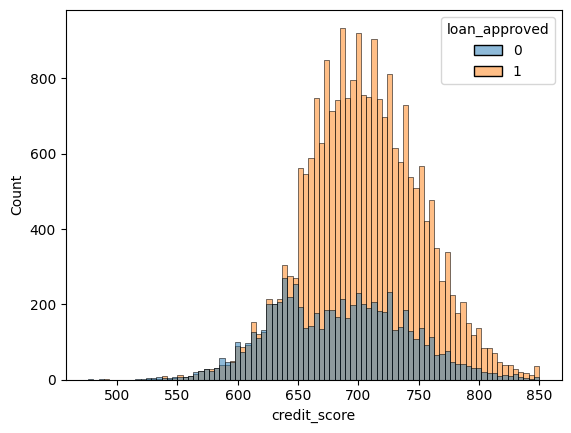

In [10]:
# Histogram to see if there's any relation between credit score and loan approval

sns.histplot(data = df_a, x = 'credit_score', hue = 'loan_approved', kde = False)

From the plot we cannot define much, but we can see that the loan approval is high for the people who has credit score 650 - 750 which was also not consistent .

<Axes: >

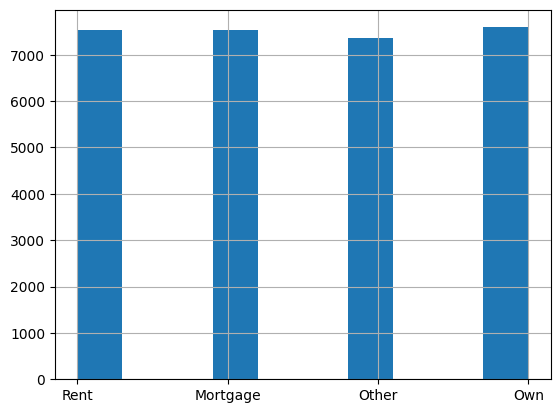

In [11]:
# Histogram to show the distribution of the home ownership

df_a.home_ownership.hist()

<Axes: xlabel='home_ownership', ylabel='Count'>

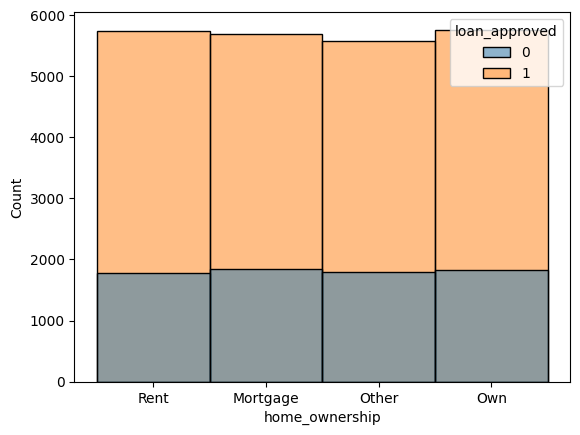

In [12]:
# Histogram to see if there's any relation between home ownership and loan approval

sns.histplot(data = df_a, x = 'home_ownership', hue = 'loan_approved', kde = False)

The rate of loan approval is same for all categories.

<Axes: >

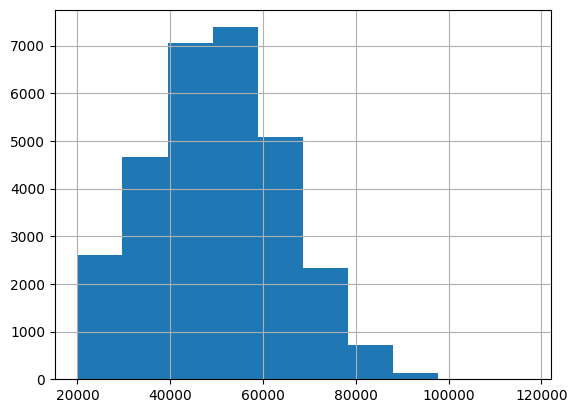

In [13]:
# Histogram to show the distribution of the credit score

df_a.income.hist()

<Axes: xlabel='income', ylabel='Count'>

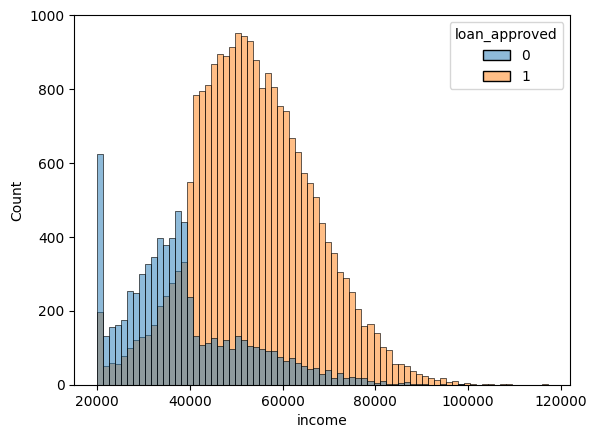

In [14]:
# Histogram to see if there's any relation between income and loan approval

sns.histplot(data = df_a, x = 'income', hue = 'loan_approved', kde = False)

The plot shows most of the loan rejections were for the people who have salary within range of 20k - 40k.

<Axes: xlabel='loan_amount', ylabel='Count'>

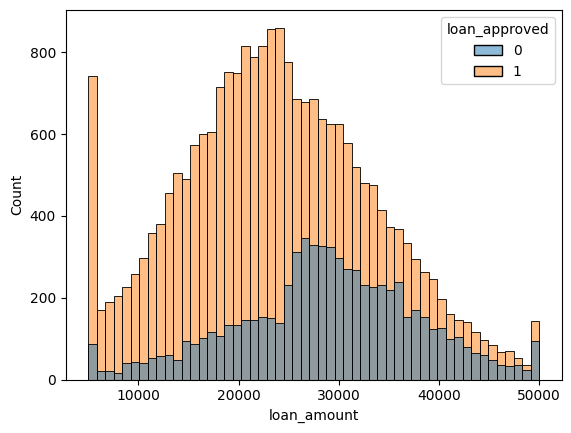

In [15]:
# Histogram to see if there's any relation between amount of loan and loan approval

sns.histplot(data = df_a, x = 'loan_amount', hue = 'loan_approved', kde = False)

The loan amount of 20k - 30k has most approval rate. From the plot we can see there is an increase in approval rate from 10k to 25k, the it gradually decreased.

<Axes: xlabel='existing_debt', ylabel='Count'>

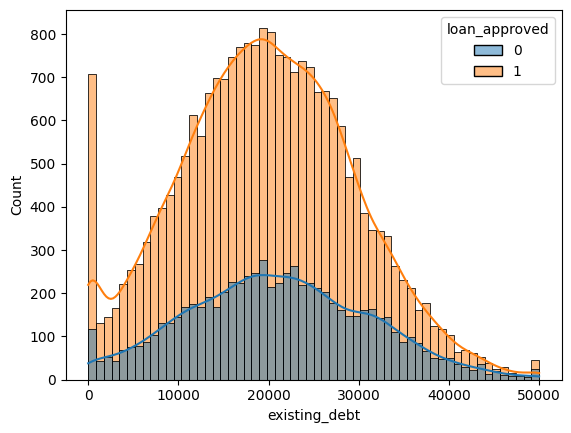

In [16]:
# Histogram to see if there's any relation between existing debt and loan approval

sns.histplot(data = df_a, x = 'existing_debt', hue = 'loan_approved',kde = True)

From the plot we can see that people who have less amount of debt and most amount of debt has less approval rate as compared to people who have debt within the range of 20k.

<Axes: xlabel='purpose', ylabel='Count'>

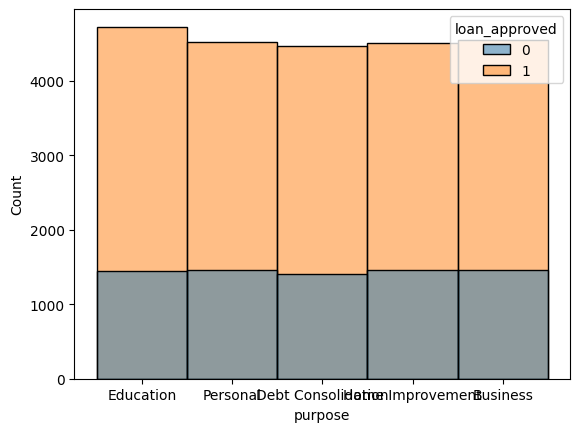

In [17]:
# Histogram to see if there's any relation between purpose and loan approval

sns.histplot(data = df_a, x = 'purpose', hue = 'loan_approved', kde = False)

We can notice that rate of loan approval is rejection is same for all the categories.

<Axes: xlabel='loan_term', ylabel='count'>

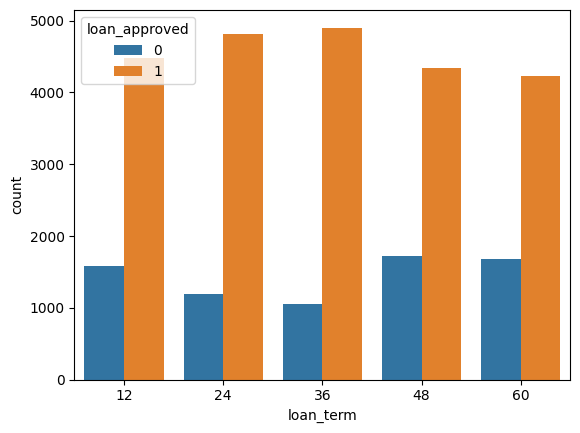

In [18]:
# Plot to see if there's any relation between loan term and loan approval

sns.countplot(data = df_a, x = 'loan_term', hue = 'loan_approved')

The loan approval is high for 24 months and 36 months term as compared to other loan terms.

<Axes: xlabel='monthly_rent_or_mortgage', ylabel='Count'>

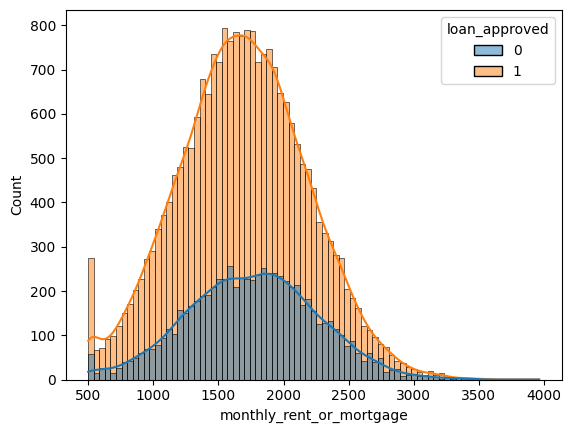

In [19]:
# Histogram to see if there's any relation between monthly rent or mortgage and loan approval

sns.histplot(data = df_a, x = 'monthly_rent_or_mortgage', hue = 'loan_approved',kde = True)

<Axes: xlabel='num_credit_lines', ylabel='count'>

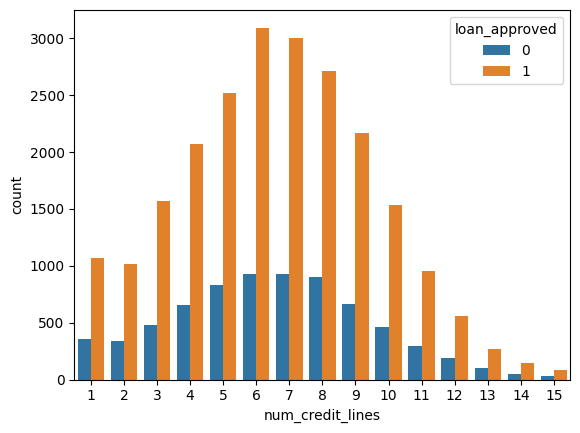

In [20]:
# Plot to see if there's any relation between number of credit lines and loan approval

sns.countplot(data = df_a, x = 'num_credit_lines', hue = 'loan_approved')

we can see that the people with less number of credit lines and more number of credit lines has less approvals of loan than the people who have the 6-7 credit lines.

# Findings from the Analysis

- The dataset is not balanced.
- From the dataset we can use 9 columns as features to develop the model.
- We have 7 numerical features and 2 categorical features.
- The insights between the target variable and other features are mentioned under the plots.

# Feature Engineering

- Imputation
- Encoding
- Scaling & Normalization
- Feature Selection


In [21]:
df_a.head()

,income,credit_score,loan_amount,loan_term,employment_length,existing_debt,num_credit_lines,home_ownership,purpose,birth_year,monthly_rent_or_mortgage,has_default_last_7yrs,loan_approved
0,57450,600,25788,48,11,16569.26,9,Rent,Education,1979,1691,0,0
1,47926,647,30628,12,5,17333.25,8,Mortgage,Personal,1964,1278,0,0
2,59715,670,28411,12,1,23309.66,4,Other,Debt Consolidation,1954,1268,0,0
3,72845,707,12220,12,15,12695.63,9,Rent,Home Improvement,1995,1815,0,1
4,46487,751,23137,12,12,21292.12,9,Mortgage,Personal,1950,672,0,1


In [22]:
# Selecting the features
Features = ['loan_amount','loan_term','income','credit_score','home_ownership','purpose','existing_debt','num_credit_lines','monthly_rent_or_mortgage']

cat_features = ['home_ownership','purpose']
num_features = ['loan_amount','loan_term','income','credit_score','existing_debt','monthly_rent_or_mortgage','num_credit_lines']

# Pipeline Creation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('num pipeline', num_pipeline, num_features),
                                                      ('cat pipeline', cat_pipeline, cat_features)])

processing_pipeline

ColumnTransformer(transformers=[('num pipeline',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['loan_amount', 'loan_term', 'income',
                                  'credit_score', 'existing_debt',
                                  'monthly_rent_or_mortgage',
                                  'num_credit_lines']),
                                ('cat pipeline',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['home_ownership', 'purpose'])])

# LOGISTIC REGRESSION AND RANDOM FOREST

We have built ML models to predict loan approvals.
-  ⁠We are checking which algorithm works the best.
-  Imbalanced data set: The model may favor approval more than rejection.


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = df_a[['loan_amount','loan_term','income','credit_score','home_ownership','purpose','existing_debt','monthly_rent_or_mortgage','num_credit_lines']]
y = df_a['loan_approved']

# Creating a balanced sample with equal cases of the target variable
sample_size = min(df_a['loan_approved'].value_counts())
balanced_df = df_a.groupby('loan_approved').apply(lambda x: x.sample(sample_size)).reset_index(drop=True)

# Splitting the balanced sample into features and target variable
X_balanced = balanced_df[['loan_amount','loan_term','income','credit_score','home_ownership','purpose','existing_debt','monthly_rent_or_mortgage','num_credit_lines']]
y_balanced = balanced_df['loan_approved']

# Splitting the balanced sample into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


# Logistic Regression
logreg_pipeline = Pipeline([('preprocessing', processing_pipeline),
                             ('logreg', LogisticRegression())])

# Random Forest
rf_pipeline = Pipeline([('preprocessing', processing_pipeline),
                        ('rf', RandomForestClassifier())])



<ipython-input-23-491094e14a20>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df_a.groupby('loan_approved').apply(lambda x: x.sample(sample_size)).reset_index(drop=True)


# CROSS VALIDATION ; LOGISTIC REGRESSION AND RANDOM FOREST

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Defining the models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()

logistic_regression_pipeline = Pipeline([
    ('preprocessing', processing_pipeline),
    ('classifier', logistic_regression)
])

random_forest_pipeline = Pipeline([
    ('preprocessing', processing_pipeline),
    ('classifier', random_forest)
])

X = df_a[['loan_amount','loan_term','income','credit_score','home_ownership','purpose','existing_debt','monthly_rent_or_mortgage','num_credit_lines']]
y = df_a['loan_approved']
# Perform cross-validation
logistic_regression_cv_scores = cross_val_score(logistic_regression_pipeline, X, y, cv=5, scoring='precision')
random_forest_cv_scores = cross_val_score(random_forest_pipeline, X, y, cv=5, scoring='precision')

# Print the mean cross-validation scores
print("Logistic Regression CV Scores:", logistic_regression_cv_scores.mean())
print("Random Forest CV Scores:", random_forest_cv_scores.mean())

Logistic Regression CV Scores: 0.8639249143801278
Random Forest CV Scores: 0.9031049758169264


# EVALUATION USING LOGISTIC REGRESSION AND RANDOM FOREST

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Make predictions using cross-validated logistic regression and random forest models
logistic_regression_cv_preds = cross_val_predict(logreg_pipeline, X, y, cv=5)
random_forest_cv_preds = cross_val_predict(rf_pipeline, X, y, cv=5)

logistic_regression_accuracy = accuracy_score(y, logistic_regression_cv_preds)
logistic_regression_precision = precision_score(y, logistic_regression_cv_preds)
logistic_regression_recall = recall_score(y, logistic_regression_cv_preds)
logistic_regression_f1 = f1_score(y, logistic_regression_cv_preds)

# Calculate evaluation metrics for random forest
random_forest_accuracy = accuracy_score(y, random_forest_cv_preds)
random_forest_precision = precision_score(y, random_forest_cv_preds)
random_forest_recall = recall_score(y, random_forest_cv_preds)
random_forest_f1 = f1_score(y, random_forest_cv_preds)

# Print evaluation metrics
print("Logistic Regression Evaluation Metrics:")
print("Accuracy:", logistic_regression_accuracy)
print("Precision:", logistic_regression_precision)
print("Recall:", logistic_regression_recall)
print("F1 Score:", logistic_regression_f1)
print()

print("Random Forest Evaluation Metrics:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1 Score:", random_forest_f1)

Logistic Regression Evaluation Metrics:
Accuracy: 0.8403
Precision: 0.8639216162597676
Recall: 0.9371925509486999
F1 Score: 0.8990667200370784

Random Forest Evaluation Metrics:
Accuracy: 0.8783
Precision: 0.9039087259666174
Recall: 0.9395203794799719
F1 Score: 0.9213705769603515


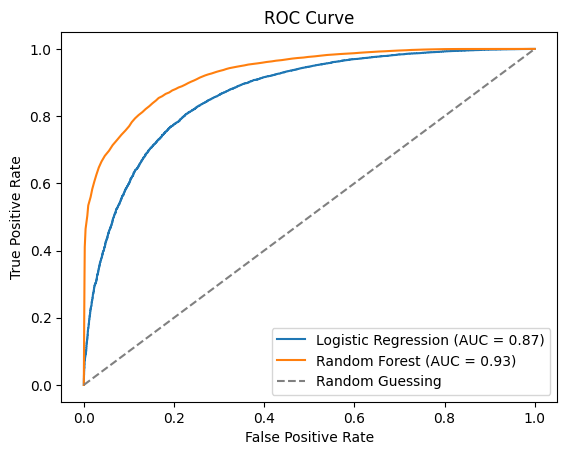

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate predicted probabilities for logistic regression and random forest models
logistic_regression_cv_probs = cross_val_predict(logreg_pipeline, X, y, cv=5, method='predict_proba')[:, 1]
random_forest_cv_probs = cross_val_predict(rf_pipeline, X, y, cv=5, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC for logistic regression
logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y, logistic_regression_cv_probs)
logistic_regression_auc = roc_auc_score(y, logistic_regression_cv_probs)

# Calculate ROC curve and AUC for random forest
random_forest_fpr, random_forest_tpr, _ = roc_curve(y, random_forest_cv_probs)
random_forest_auc = roc_auc_score(y, random_forest_cv_probs)

# Plot ROC curve for logistic regression
plt.plot(logistic_regression_fpr, logistic_regression_tpr, label='Logistic Regression (AUC = %0.2f)' % logistic_regression_auc)

# Plot ROC curve for random forest
plt.plot(random_forest_fpr, random_forest_tpr, label='Random Forest (AUC = %0.2f)' % random_forest_auc)

# Plot ROC curve for random guessing (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

From the graph we can say that the model performance is great, and random forest gives best result than the logistic regression in prediction the approval and rejected applications.

In conclusion
-  ⁠⁠Credit score & income helps predict approvals but they are not the only factors
-  ⁠Owning home doest gurantee aproval
- Loan purpose does matters for example the Business loans are risker and less likely to get approved.

# Logistic Regression Evaluation metrics

- Accuracy: 0.8403
- Precision: 0.8639216162597676
- Recall: 0.9371925509486999
- F1 Score: 0.8990667200370784



# Random Forest Evaluation Metrics

- Accuracy: 0.8789333333333333
- Precision: 0.903883495145631
- Recall: 0.9404866479269149
- F1 Score: 0.9218218606052779